0.3333333333333333
0.10539922456186435


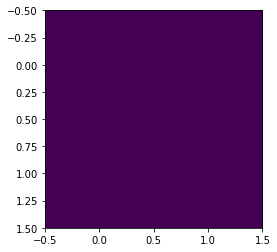

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

size = 2
sigma = size/6
print(sigma)
kernel = np.outer(signal.windows.gaussian(size, sigma),
                  signal.windows.gaussian(size, sigma))
#kernel = kernel/np.linalg.norm(kernel)

print(np.max(kernel))
kernel = np.clip(kernel, 0, 1)
plt.imshow(kernel); 
plt.show()

In [6]:
def import_image():
    import PIL
    from PIL import Image
    from PIL import ImageOps
    import numpy as np
    img_path = r"C:\Users\James_Dev_Account\OneDrive - The University of Western Australia\Documents\Honours - Galaxy Classification\Galaxy-Classification-Research-Project\generated_data\NGC5845\NGC5845.jfif"
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize((50, 50))
    #img = ImageOps.invert(img)
    np_img = np.array(img)
    np_img = (np_img - np.min(np_img)) / (np.max(np_img) - np.min(np_img))
    np.savetxt(r"C:\Users\James_Dev_Account\OneDrive - The University of Western Australia\Documents\Honours - Galaxy Classification\Galaxy-Classification-Research-Project\generated_data\NGC5845\NGC5845.dat", np_img)

In [7]:
import_image()

In [3]:
from astropy.io import fits
from astropy.table import Table
fits_data = r"C:\Users\James_Dev_Account\OneDrive - The University of Western Australia\Documents\Honours - Galaxy Classification\Galaxy-Classification-Research-Project\generated_data\photometric_decomposition_HT\photometric_decomposition_HT.fits"
hdulist = fits.open(fits_data)

hdulist.info()

Filename: C:\Users\James_Dev_Account\OneDrive - The University of Western Australia\Documents\Honours - Galaxy Classification\Galaxy-Classification-Research-Project\generated_data\photometric_decomposition_HT\photometric_decomposition_HT.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (9708,)   uint8   
  1  Joined        1 BinTableHDU    412   404R x 200C   [I, 15A, D, D, 1A, I, I, I, I, I, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L, 1A, I, I, 22A, 23A, D, D, 1A, 2

In [4]:
hdu = hdulist[1]
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                 1483 / width of table in bytes                        
NAXIS2  =                  404 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                  200 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'col1_1  '           / label for column 1                             
TFORM1  = 'I       '           / format for column 1                            
TTYPE2  = 'col2_1  '           / label for column 2                             
TFORM2  = '15A     '        

In [8]:
d = fits.getdata(fits_data, 1)
t = Table(d)

df = t.to_pandas()

NameError: name 'fits' is not defined

In [6]:
df

,col1_1,col2_1,col3_1,col4_1,col5_1,col6_1,col7_1,col8_1,col9_1,col10_1,...,col8_2,col9_2,col10_2,col11_2,col12_2,col13_2,col14_2,col15_2,col16_2,col17_2
0,2,UGC00005,0.773513,-1.913835,K,1,1,0,1,0,...,S,ab,S,c,A,A,B,I,I,I
1,3,NGC7819,1.102105,31.472008,K,1,1,1,1,0,...,S,bc,S,c,A,A,B,I,I,I
2,4,UGC00029,1.140604,28.301724,U,1,1,0,0,0,...,E,0,E,1,A,A,A,I,I,I
3,5,IC1528,1.272403,-7.093390,K,1,1,0,0,0,...,S,ab,S,d,AB,A,B,I,I,I
4,6,NGC7824,1.275987,6.920147,K,1,1,0,1,0,...,S,a,S,ab,A,A,B,I,I,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,8000,NGC0426,18.202530,-0.290190,U,1,0,0,0,0,...,E,3,S,0,A,A,A,I,I,I
400,9000,NGC0472,20.119539,32.709030,U,1,1,0,0,0,...,E,0,E,2,A,A,A,I,I,I
401,9004,NGC1281,50.025459,41.630032,K,1,1,0,0,0,...,E,7,S,0a,A,A,A,I,I,I
402,9005,NGC2767,137.549515,50.401299,K,1,1,1,1,0,...,E,0,S,0,A,A,A,I,I,I


In [7]:
df_ES = df[df["col5_1"] == "U"]

In [8]:
df_E = df[(df["col5_1"] == "K") & (df["col23"] == 1.0)]

In [49]:
ES_name_ra_dec = df_ES[["col2_1", "col3_1", "col4_1"]]
ES_name_ra_dec.shape

In [55]:
E_name_ra_dec = df_E[["col2_1", "col3_1", "col4_1"]]
E_name_ra_dec = df_E.copy()
ES_name_ra_dec.shape

,col2_1,col3_1,col4_1
12,NGC0155,8.667001,-10.766513
30,NGC0517,21.182524,33.429592
41,NGC0731,28.734207,-9.010813
44,NGC0774,29.894703,14.008204
55,NGC0938,37.139660,20.283697
61,NGC1026,39.829975,6.544043
65,UGC02229,41.364864,0.914349
81,NGC1361,53.573925,-6.264996
128,NGC2918,143.933502,31.705465
136,NGC3182,154.887634,58.205730


In [61]:
def download_SDSS_imgcutouts(name_ra_dec_df):
    import requests
    import PIL as pil
    from PIL import Image
    import io
    name_ra_dec_df['image_data'] = None
    for row_index in name_ra_dec_df.index:
        row = name_ra_dec_df.loc[row_index]
        
        name = row["col2_1"]
        ra = row["col3_1"]
        dec = row["col4_1"]
        
        url = r"http://skyserver.sdss.org/dr15/SkyServerWS/ImgCutout/getjpeg?ra=" + str(ra) + r"&dec=" + str(dec) + r"&scale=1&height=50&width=50"
        res = requests.get(url, timeout=60)
        

        img = Image.open(io.BytesIO(res.content)).convert("L")
        np_arr = np.array(img)
        name_ra_dec_df['image_data'][row_index] = np_arr
        break


<ipython-input-61-1c388ed4b9d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_ra_dec_df['image_data'] = None
<ipython-input-61-1c388ed4b9d8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_ra_dec_df['image_data'][row_index] = np_arr
<ipython-input-62-b2dfe35cea99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  download_SDSS_imgcutouts(E_name_ra_dec)


TypeError: 'NoneType' object is not subscriptable

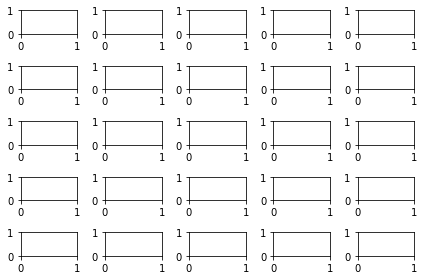

In [62]:
#download_SDSS_imgcutouts(E_name_ra_dec)
%run .\plotting_helpers.ipynb
plot_classification_results(images=E_name_ra_dec['image_data'], y_preds=None, y_labels=None, random_sample=False)